In [26]:
""" Imports """
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks, argrelextrema

# Manual Work - no automation

In [27]:
""" Pull Data Manually """
ch1data = pd.read_csv("LtoutputFiles/output289ch1_05_08_2023.txt", sep="\t")
ch4data = pd.read_csv("LtoutputFiles/output289ch4_05_08_2023.txt", sep="\t")

In [28]:
"""
Formatting 
- Name Columns 
- Create Data frame
    - Quick plot: <dataframe>.plot()
- Truncate: not needed (?)
- Array assignment 
"""

# Name columns 
ch1data.columns =["Time", "V(compout)-CH1"]
ch4data.columns =["Time", "V(compout)-CH4"]

# Create data frame 
ch1 = pd.DataFrame(ch1data)
ch4 = pd.DataFrame(ch4data)

# Check for shorter file and truncate 
#   - LTspice always outputs diferent length files 

# # print(f"len ch1: {len(ch1)}\nlen ch4: {len(ch4)}")
# if len(ch1) < len(ch4): 
#     ch1 = ch1.truncate(after=len(ch1)-1) # smallest less 1 bc `after` adds a value
#     ch4 = ch4.truncate(after=len(ch1)-1)
# else: 
#     ch1 = ch1.truncate(after=len(ch4)-1)
#     ch4 = ch4.truncate(after=len(ch4)-1)
# # print(f"\nTruncation:\nlen ch1: {len(ch1)}\nlen ch4: {len(ch4)}")

# Naming and floats
ch1t = ch1["Time"].to_numpy()
ch4t = ch4["Time"].to_numpy()
ch1V = ch1["V(compout)-CH1"].to_numpy()
ch4V = ch4["V(compout)-CH4"].to_numpy()

<Axes: >

<Figure size 640x480 with 0 Axes>

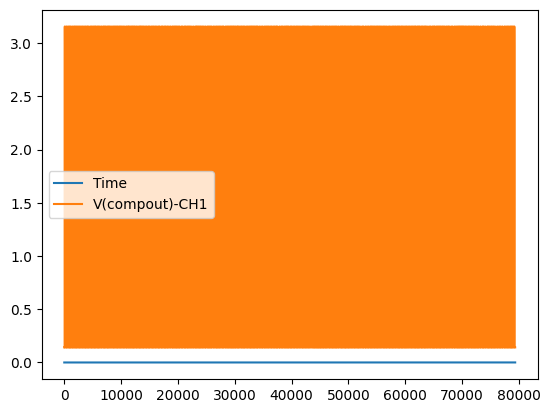

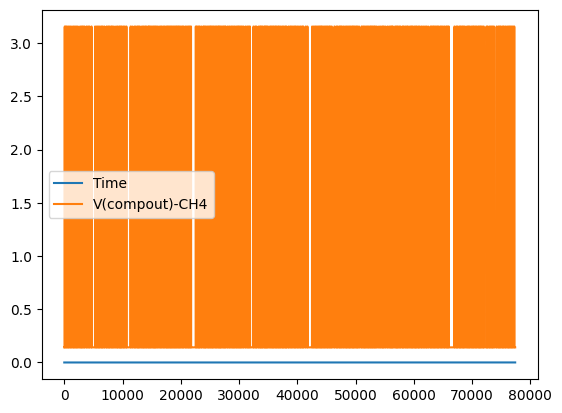

In [29]:
""" View Full Data """
plt.figure(1)
ch1.plot()
plt.figure(2)
ch4.plot()

In [30]:
""" 
Find Rising edge (Full dataset): Testing block
    - Variable Threshold voltage: 1.6V 
"""
# set
threshold = 1.6 # volts

# use scipy
peakindexCH1, _ = find_peaks(ch1V, height=threshold, distance =25)
peakindexCH4, _ = find_peaks(ch4V, height=threshold, distance =25)
peaksV_CH1 = ch1V[peakindexCH1]
peaksV_CH4 = ch4V[peakindexCH4]

print(f'Total # of Peak indices\nch1: {len(peakindexCH1)}\nch4: {len(peakindexCH4)}')

Total # of Peak indices
ch1: 302
ch4: 290


Window details:
# of indices CH1: 3
# of indices CH4: 3
Time interval CH1: 2.70e-13
Time internal Ch4: 4.65e-12

Both Channels


<Figure size 640x480 with 0 Axes>

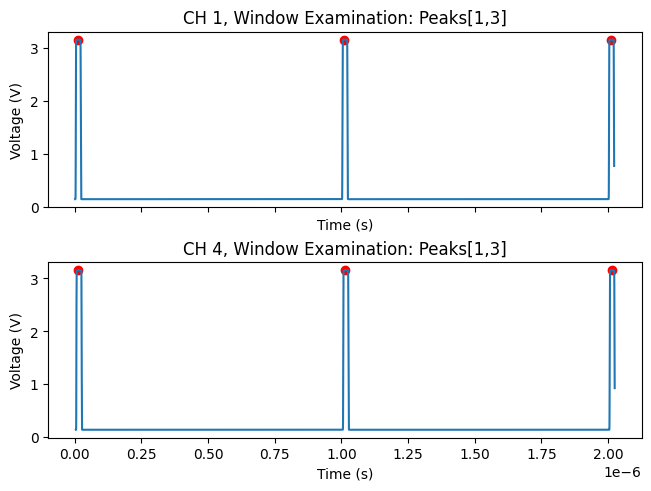

In [36]:
"""
Examine any Window of Data 
- peaks will serve as reference points
- Select left/right peaks 
- Select Channel 
"""

# Set window: [1st peak : 29th peak] & select window 
left_peak = 1
right_peak = 3

# To see both set Ch_select = 0
Ch_select = 0


# Window
ch1_wind = ch1.truncate(before=peakindexCH1[left_peak-1]-25 , after=peakindexCH1[right_peak-1]+20)
ch4_wind = ch4.truncate(before=peakindexCH4[left_peak-1]-25 , after=peakindexCH4[right_peak-1]+20)

# Extract arrays 
ch1t_wind = ch1_wind["Time"].to_numpy()
ch4t_wind = ch4_wind["Time"].to_numpy()
ch1V_wind = ch1_wind["V(compout)-CH1"].to_numpy()
ch4V_wind = ch4_wind["V(compout)-CH4"].to_numpy()

dtCH1 = ch1t[right_peak] - ch1t[left_peak]
dtCH4 = ch4t[right_peak] - ch4t[left_peak]

# Prints
text =f'Window details:\n# of indices CH1: {len(peakindexCH1[left_peak:right_peak+1])}'
text += f'\n# of indices CH4: {len(peakindexCH4[left_peak:right_peak+1])}'
text += f'\nTime interval CH1: {dtCH1:2.2e}'
text += f'\nTime internal Ch4: {dtCH4:2.2e}'
print(text)

if Ch_select == 1: 
    print(f"Channel {Ch_select}: ")
    plt.figure(1, figsize = (6,4))
    plt.plot(ch1t_wind,ch1V_wind, label="CH1-Data")
    plt.scatter(ch1t[peakindexCH1[left_peak-1:right_peak]],
                ch1V[peakindexCH1[left_peak-1:right_peak]],  
                marker='o', 
                color='red', 
                label="Peak")

    plt.title(f"CH {Ch_select}, Window Examination: Peaks[{left_peak},{right_peak}]")
    plt.xlabel("Time")
    plt.ylabel("Voltage (V)")
    # plt.axvline(x = 6e-9, color = 'b', label = 'axvline - full height')
    plt.axhline(y = 1.5, color = 'r', linestyle = '-', label='Mid value')
    plt.legend(bbox_to_anchor=(1,1))

elif Ch_select == 4:
    print(f"Channel {Ch_select}: ")

    plt.figure(2, figsize = (6,4))
    plt.plot(ch4t_wind,ch4V_wind, label="CH4-Data")
    plt.scatter(ch4t[peakindexCH4[left_peak-1:right_peak]],
                ch4V[peakindexCH4[left_peak-1:right_peak]],  
                marker='o', 
                color='red', 
                label="Peak")

    plt.title(f"CH {Ch_select}, Window Examination: Peaks[{left_peak},{right_peak}]")
    plt.xlabel("Time")
    plt.ylabel("Voltage (V)")
    # plt.axvline(x = 6e-9, color = 'b', label = 'axvline - full height')
    plt.axhline(y = 1.5, color = 'r', linestyle = '-', label='Mid value')
    plt.legend(bbox_to_anchor=(1,1))

elif Ch_select == 0: 
    print('\nBoth Channels')
    plt.figure(3)
    fig, ax = plt.subplots(2,1, sharex=True, constrained_layout=True)

    ax[0].plot(ch1t_wind,ch1V_wind, label="CH1-Data")
    ax[0].scatter(ch1t[peakindexCH1[left_peak-1:right_peak]],
                ch1V[peakindexCH1[left_peak-1:right_peak]],  
                marker='o', 
                color='red', 
                label="Peak")
    
    ax[0].set_title(f"CH 1, Window Examination: Peaks[{left_peak},{right_peak}]")
    ax[0].set_ylabel('Voltage (V)')
    ax[0].set_xlabel('Time (s)')

    ax[1].plot(ch4t_wind,ch4V_wind, label="CH4-Data")
    ax[1].scatter(ch4t[peakindexCH4[left_peak-1:right_peak]],
                ch4V[peakindexCH4[left_peak-1:right_peak]],  
                marker='o', 
                color='red', 
                label="Peak")
    ax[1].set_title(f"CH 4, Window Examination: Peaks[{left_peak},{right_peak}]")
    ax[1].set_ylabel('Voltage (V)')
    ax[1].set_xlabel('Time (s)')
plt.show()

Expected to hit 49 points from CH1
We expect to remove 0 points from CH1
length of output 50
Count: 49
Removed: 0
Pulses: 49
Expected to hit 49 points from CH4
We expect to remove 3 points from CH4
Count:50 = num: 50 break
length of output 50
Count: 50
Removed: 3
Pulses: 47
ch1 length 50 largest time diff 1.00031e-06 zeros 1
ch4 length 50 largest time diff 3.80055e-05 zeros 3
finished calculating, 46 particles


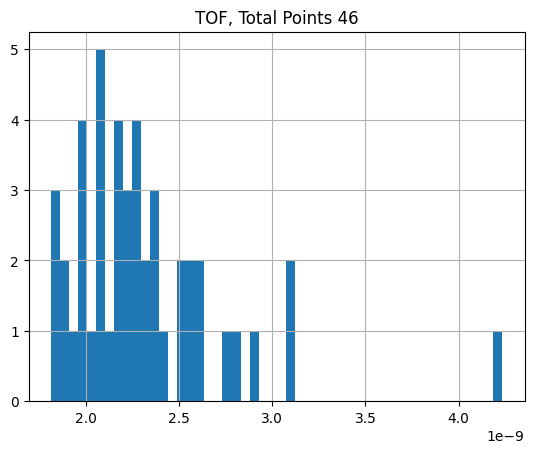

In [35]:
"""
Alternate ToF Method Assuming Seperation Width and Known # of Particles
- Attempt 2
- IMPORTANT: Number of particles originally generated is unknown so we will go with what peaks found in entry: CH1
"""
# First try with truncation 
right_peak = 50
ch1 = ch1.truncate(after=peakindexCH1[right_peak-1])
ch4 = ch4.truncate(after=peakindexCH4[right_peak-1])
# Naming and floats
ch1t = ch1["Time"].to_numpy()
ch4t = ch4["Time"].to_numpy()
ch1V = ch1["V(compout)-CH1"].to_numpy()
ch4V = ch4["V(compout)-CH4"].to_numpy()

num = len(peakindexCH1[:50])        # known pulses 50
Ch_select = 1

def time_at_tresh(cht,chV, num, thresh=1.5,Ch_select="no formal value given"): 

    # Values
    grad = np.gradient(chV)             # Gradients for all Voltage values
    limit = grad >= 0.1                 # Boolean gradients larger >= 0.1

    # Truncate data - keep limit values: Rise time (rtime), Rise Voltage(rV)

    rtime = cht[limit]         
    rV = chV[limit]

    tdiff = np.diff(rtime)              # Check time between points CH1

    Lower_lim_1 = 1e-7
    Lower_lim_2 = 1.5e-6
    condition_1 = tdiff > 1e-7          # is the next point 100ns away - continue condition (Boolean array)
    condition_2 = tdiff > 1.5e-6          # is there a gap of 1500ns - skip condition         (Boolean array)

    print(f'Expected to hit {len(tdiff[condition_1])} points from CH{Ch_select}')
    print(f'We expect to remove {len(tdiff[tdiff>Lower_lim_2])} points from CH{Ch_select}')
    count = 0                            # Record our hits 
    start_index = 0
    removed_count = 0
    pulses = 0
    out = np.zeros(num)    
    removed = []
    for i in range(len(tdiff)):         # [0, # of indices to check]
        # dt = rtime[i:start_index]                   
        # dv = rV[i:start_index]
                 
        if condition_1[i]:
            # print(condition_1[i])                              
            dt = rtime[start_index:i]                   
            dv = rV[start_index:i]
            # print(len(dt))

            # print(f'st indx: {start_index}, inx:{i} ')
            start_index = i+1
            # print(f'st indx: {start_index}, inx:{i} ')
                          
            if len(dt) < 1 or len(dv) < 1:              
                continue
            m, b = np.polyfit(dt,dv, deg =1)

            # y = mt + b  --> t = (y - b) / m
            if count >= num: 
                print(f'Count:{count} = num: {num} break')
                break
            else: 
                out[count] = (thresh -b) / m
                count += 1
                # print('should not print')
            pulses += 1
        if condition_2[i]:          
            count += 1
            removed_count +=1
            # print('removed')
            # print(dt)
        # else:
            # print("ass")
            


    print(f"length of output {len(out)}")
    print(f'Count: {count}')
    print(f'Removed: {removed_count}')
    print(f'Pulses: {pulses}')
    return np.array(out)

out1 = time_at_tresh(ch1t, ch1V, num, Ch_select=1)
out4 = time_at_tresh(ch4t, ch4V, num, Ch_select=4)

def TOF_finalize(tofch1, tofch4, num):
    print("ch1 length", len(tofch1), "largest time diff", "%.5e" % max(np.diff(tofch1)), "zeros", (tofch1 == 0.0).sum())
    # print(tofch1)
    print("ch4 length", len(tofch4), "largest time diff", "%.5e" % max(np.diff(tofch4)), "zeros", (tofch4 == 0.0).sum())
    # print(tofch4)
    out = []
    for i in range(num):
        if (tofch1[i] == 0) or (tofch4[i] == 0):
            continue
        out.append(abs(tofch1[i] - tofch4[i]))
    print("finished calculating,", len(out), "particles")
    return np.array(out)

    
FinalToF = TOF_finalize(out1,out4, num)

plt.figure(1)
plt.title(f'TOF, Total Points {len(FinalToF[FinalToF<1e-6])}')
plt.hist(FinalToF[FinalToF<1e-6], bins=50)
plt.grid()
plt.show()

In [33]:
""" Print Checks """
# text = f"Number of peaks CH1: {len(peakindexCH1[left_peak-1:right_peak])}"
# print(text)
text  = f"# of Total points in Ch1: {len(ch1t)}"
text += f"\n# of Total points in Ch4: {len(ch4t)}"
text += f"\n# of Total points found after Boolean truncation in Ch1: {len(tdiff_CH1)}"
text += f"\n# of Total points found after Boolean truncation in Ch1: {len(tdiff_CH4)}"
print(text)

# text =  f"\nLength of conition_1: {len(condition_1_CH1)}"
# text += f"\nLength of conition_2: {len(condition_2_CH1)}"
# text +=  f"\n\nLength of conition_1: {len(condition_1_CH4)}"
# text += f"\nLength of conition_2: {len(condition_2_CH4)}"
# print(text)

# if condition_1_CH1[0]:
#     print(condition_1_CH1[0])
# print(condition_1_CH1[1:1])

# print('Number of expected peaks:', num)


print("We expect to remove", len(tdiff_CH4[tdiff_CH4>1e-6]))

# if False skip = if slope isn't desired skip else do block
# [],[1,1],[2,2],...
# [0,1],[1,2],...
# if [] is an option coninue 

NameError: name 'tdiff_CH1' is not defined

In [ ]:
f = np.zeros(5)
print(len(f))
f[5]= 3


5


IndexError: index 5 is out of bounds for axis 0 with size 5